# SuperMarket Product Basket Sales Analysis

  ## Data Collection


### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("orders.csv")

In [ ]:
df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

In [ ]:
df2=pd.read_csv("order_products__prior.csv")
df2

order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]

In [ ]:
df3=pd.merge(df,df2,how="inner",on="order_id")


In [ ]:
df4=pd.read_csv("products.csv")

In [ ]:
df4.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [ ]:
df5=pd.merge(df3,df4,how="inner",on="product_id")

In [ ]:
df5.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id  
0         Soda        77              7  
1         Soda        77              7  
2         Soda        77              7  
3         Soda        77              7  
4         Soda        77              7

In [ ]:
df5.tail()

order_id  user_id eval_set  order_number  order_dow  \
32434484   1320836   202557    prior            17          2   
32434485     31526   202557    prior            18          5   
32434486    758936   203436    prior             1          2   
32434487   2745165   203436    prior             2          3   
32434488   3093936   205420    prior             1          4   

          order_hour_of_day  days_since_prior_order  product_id  \
32434484                 15                     1.0       43553   
32434485                 11                     3.0       43553   
32434486                  7                     NaN       42338   
32434487                  5                    15.0       42338   
32434488                 14                     NaN       28818   

          add_to_cart_order  reordered                   product_name  \
32434484                  2          1            Orange Energy Shots   
32434485                  2          1            Orange Energy Shots   
32434486                  4          0          Zucchini Chips, Pesto   
32434487                 16          1          Zucchini Chips, Pesto   
32434488                  8          0  Hot Oatmeal Multigrain Raisin   

          aisle_id  department_id  
32434484        64              7  
32434485        64              7  
32434486        50             19  
32434487        50             19  
32434488       130             14

In [ ]:
df6=pd.merge(df5,pd.read_csv("departments.csv"),how="inner",on="department_id")

In [ ]:
df6.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id department  
0         Soda        77              7  beverages  
1         Soda        77              7  beverages  
2         Soda        77              7  beverages  
3         Soda        77              7  beverages  
4         Soda        77              7  beverages

In [ ]:
df6.shape

(32434489, 14)

In [ ]:
df_final=df6.sample(n=100000,random_state=42)

In [ ]:
df_final.head()

order_id  user_id eval_set  order_number  order_dow  \
29481110   2046857   186256    prior            20          4   
2852353     512195   179205    prior             3          3   
11194500   2643829    38899    prior             1          5   
15909397   2818258   198321    prior             2          0   
6101870    3328253   134750    prior            22          3   

          order_hour_of_day  days_since_prior_order  product_id  \
29481110                 12                     3.0       30440   
2852353                  15                    26.0       35951   
11194500                 17                     NaN         605   
15909397                 12                     8.0       26209   
6101870                   6                     3.0       29447   

          add_to_cart_order  reordered  \
29481110                  9          1   
2852353                   3          1   
11194500                 17          0   
15909397                  6          0   
6101870                   2          1   

                                               product_name  aisle_id  \
29481110                                   Chocolate Crepes        93   
2852353                     Organic Unsweetened Almond Milk        91   
11194500  Natural Liquid Laundry Detergent - Blue Eucaly...        75   
15909397                                              Limes        24   
6101870                            Milk, Organic, Vitamin D        84   

          department_id  department  
29481110              3      bakery  
2852353              16  dairy eggs  
11194500             17   household  
15909397              4     produce  
6101870              16  dairy eggs

### Final DataSet Containing Every Column

In [ ]:
df_final.drop("aisle_id",axis=1)

order_id  user_id eval_set  order_number  order_dow  \
29481110   2046857   186256    prior            20          4   
2852353     512195   179205    prior             3          3   
11194500   2643829    38899    prior             1          5   
15909397   2818258   198321    prior             2          0   
6101870    3328253   134750    prior            22          3   
...            ...      ...      ...           ...        ...   
27036531   2852375   144798    prior             3          4   
22944134   3316036    81773    prior            11          1   
12514502    299413    93582    prior            10          1   
26145504    334732   112061    prior             8          1   
32288685   2413500   150661    prior            16          3   

          order_hour_of_day  days_since_prior_order  product_id  \
29481110                 12                     3.0       30440   
2852353                  15                    26.0       35951   
11194500                 17                     NaN         605   
15909397                 12                     8.0       26209   
6101870                   6                     3.0       29447   
...                     ...                     ...         ...   
27036531                  6                     6.0        3647   
22944134                 14                     6.0       40627   
12514502                  9                     3.0       45066   
26145504                  9                    20.0        6669   
32288685                 15                    16.0       34540   

          add_to_cart_order  reordered  \
29481110                  9          1   
2852353                   3          1   
11194500                 17          0   
15909397                  6          0   
6101870                   2          1   
...                     ...        ...   
27036531                 39          0   
22944134                  6          0   
12514502                  1          1   
26145504                  1          1   
32288685                 11          0   

                                               product_name  department_id  \
29481110                                   Chocolate Crepes              3   
2852353                     Organic Unsweetened Almond Milk             16   
11194500  Natural Liquid Laundry Detergent - Blue Eucaly...             17   
15909397                                              Limes              4   
6101870                            Milk, Organic, Vitamin D             16   
...                                                     ...            ...   
27036531                       Soft Dinner 6 Ct White Rolls              1   
22944134                                    Peach Preserves             13   
12514502                                   Honeycrisp Apple              4   
26145504                            Breakfast Scramble Wrap              1   
32288685        2nd Foods Apples & Mangos, With Rice Cereal             18   

          department  
29481110      bakery  
2852353   dairy eggs  
11194500   household  
15909397     produce  
6101870   dairy eggs  
...              ...  
27036531      frozen  
22944134      pantry  
12514502     produce  
26145504      frozen  
32288685      babies  

[100000 rows x 13 columns]

The No.of Rows was Limited to 1,00,000 due to having Less Computaion Power.

## Exploratory Data Analysis (EDA)


In [3]:
df = pd.read_csv("final_dataset.csv")
print('Columns:', df.columns.tolist())

Columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'department']


In [4]:
df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2046857   186256    prior            20          4                 12   
1    512195   179205    prior             3          3                 15   
2   2643829    38899    prior             1          5                 17   
3   2818258   198321    prior             2          0                 12   
4   3328253   134750    prior            22          3                  6   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     3.0       30440                  9          1   
1                    26.0       35951                  3          1   
2                     NaN         605                 17          0   
3                     8.0       26209                  6          0   
4                     3.0       29447                  2          1   

                                        product_name  aisle_id  department_id  \
0                                   Chocolate Crepes        93              3   
1                    Organic Unsweetened Almond Milk        91             16   
2  Natural Liquid Laundry Detergent - Blue Eucaly...        75             17   
3                                              Limes        24              4   
4                           Milk, Organic, Vitamin D        84             16   

   department  
0      bakery  
1  dairy eggs  
2   household  
3     produce  
4  dairy eggs

In [5]:
df.tail()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
99995   2852375   144798    prior             3          4                  6   
99996   3316036    81773    prior            11          1                 14   
99997    299413    93582    prior            10          1                  9   
99998    334732   112061    prior             8          1                  9   
99999   2413500   150661    prior            16          3                 15   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
99995                     6.0        3647                 39          0   
99996                     6.0       40627                  6          0   
99997                     3.0       45066                  1          1   
99998                    20.0        6669                  1          1   
99999                    16.0       34540                 11          0   

                                      product_name  aisle_id  department_id  \
99995                 Soft Dinner 6 Ct White Rolls        58              1   
99996                              Peach Preserves        88             13   
99997                             Honeycrisp Apple        24              4   
99998                      Breakfast Scramble Wrap        52              1   
99999  2nd Foods Apples & Mangos, With Rice Cereal        92             18   

      department  
99995     frozen  
99996     pantry  
99997    produce  
99998     frozen  
99999     babies

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100000 non-null  int64  
 1   user_id                 100000 non-null  int64  
 2   eval_set                100000 non-null  object 
 3   order_number            100000 non-null  int64  
 4   order_dow               100000 non-null  int64  
 5   order_hour_of_day       100000 non-null  int64  
 6   days_since_prior_order  93475 non-null   float64
 7   product_id              100000 non-null  int64  
 8   add_to_cart_order       100000 non-null  int64  
 9   reordered               100000 non-null  int64  
 10  product_name            100000 non-null  object 
 11  aisle_id                100000 non-null  int64  
 12  department_id           100000 non-null  int64  
 13  department              100000 non-null  object 
dtypes: float64(1), int64(

Here We Can See That Most of The Data Has No Null Values Except a column called "days_since_prior_order"

In [61]:
df.shape

(100000, 15)

In [60]:
df.describe()

order_id        user_id   order_number      order_dow  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.707830e+06  102845.659290      17.058890       2.743000   
std    9.877629e+05   59422.694877      17.481464       2.089415   
min    9.300000e+01      25.000000       1.000000       0.000000   
25%    8.532535e+05   51380.750000       5.000000       1.000000   
50%    1.709077e+06  102502.000000      11.000000       3.000000   
75%    2.557496e+06  154220.000000      24.000000       5.000000   
max    3.421046e+06  206209.000000      99.000000       6.000000   

       order_hour_of_day  days_since_prior_order     product_id  \
count       100000.00000           100000.000000  100000.000000   
mean            13.42236               10.359960   25597.252240   
std              4.25011                9.015285   14089.460026   
min              0.00000               -1.000000       1.000000   
25%             10.00000                4.000000   13548.000000   
50%             13.00000                7.000000   25298.500000   
75%             16.00000               14.000000   37966.000000   
max             23.00000               30.000000   49683.000000   

       add_to_cart_order      reordered       aisle_id  department_id  \
count      100000.000000  100000.000000  100000.000000  100000.000000   
mean            8.332370       0.588920      71.233300       9.896360   
std             7.092729       0.492032      38.162224       6.279471   
min             1.000000       0.000000       1.000000       1.000000   
25%             3.000000       0.000000      31.000000       4.000000   
50%             6.000000       1.000000      83.000000       9.000000   
75%            11.000000       1.000000     107.000000      16.000000   
max            99.000000       1.000000     134.000000      21.000000   

             recency  
count  100000.000000  
mean        6.384250  
std        13.311099  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         6.000000  
max        98.000000

df.Describe() shows the summary of data
* Statistics Summary - Mean,Count,STD,Min,Max for Every Column.
* Quartile Ranges - 25,50,75 i.e q1,q2,q3 Of Data For Every Column.

In [4]:
# Check if 0 is already used in your data
print(df['days_since_prior_order'].min())

0.0


In [5]:
df["days_since_prior_order"] = df["days_since_prior_order"].fillna(-1)
df["days_since_prior_order"].isnull().sum()

np.int64(0)

Here We filled Null Value With -1 instead of 0
The reason is 
* 0 represents Same day order
* Optimal Way is to Impute them with -1 representing that he never ordered 

<Axes: >

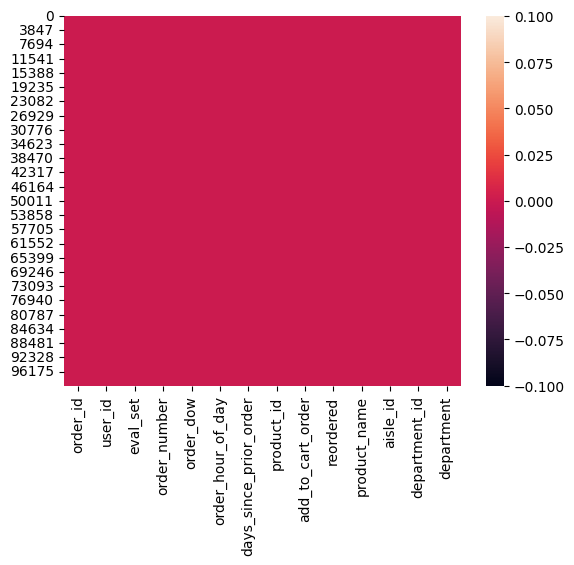

In [6]:
sns.heatmap(df.isnull())

<Axes: ylabel='days_since_prior_order'>

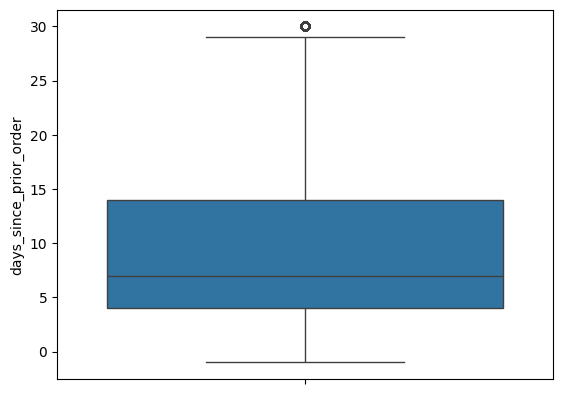

In [6]:
sns.boxplot(df["days_since_prior_order"])

Here We Detected A Small Number of Outliers In "days_since_prior_order" Column.
The reason to Not removing The Outliers is:
* It Describes The Behaviour of User Buying,  i.e We Can See the Behaviour of The User that if days_since_prior_order=31
That Means He Rarely Buys Anything from The Shop

In [15]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
    print(i)

order_id
user_id
order_number
order_dow
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered
aisle_id
department_id


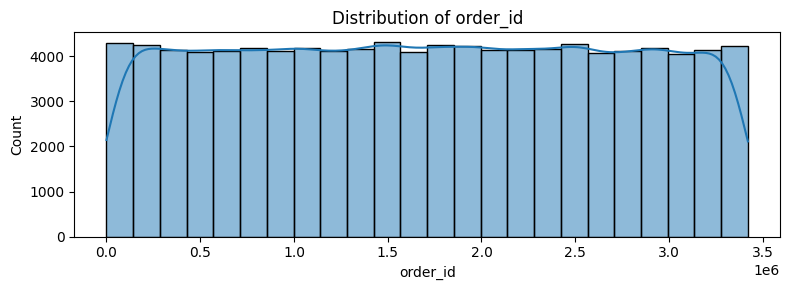

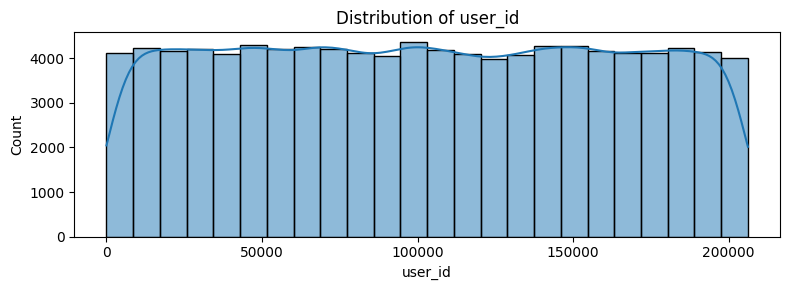

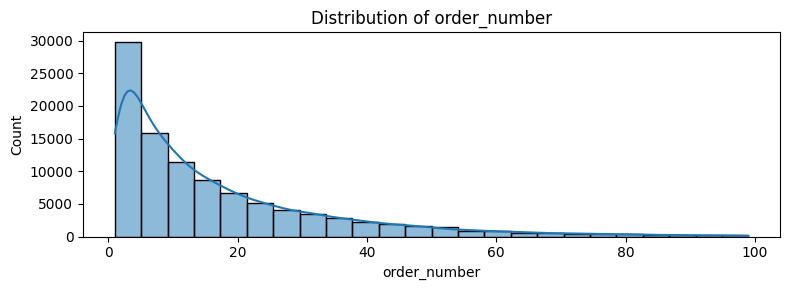

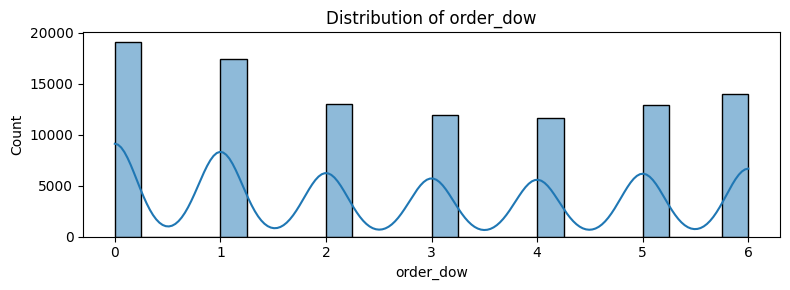

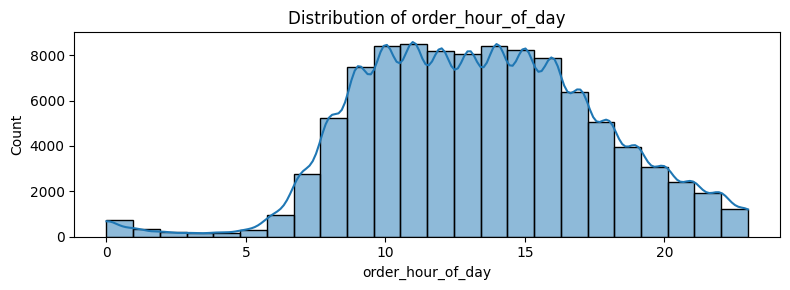

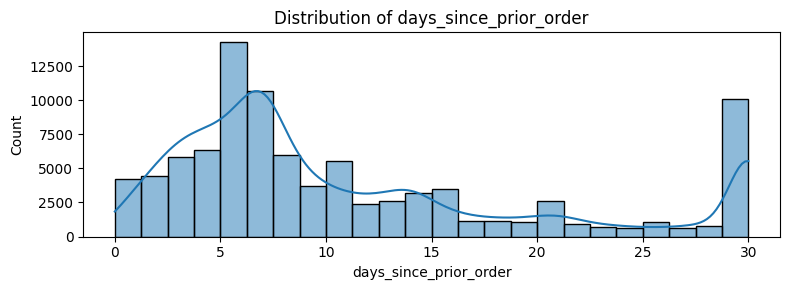

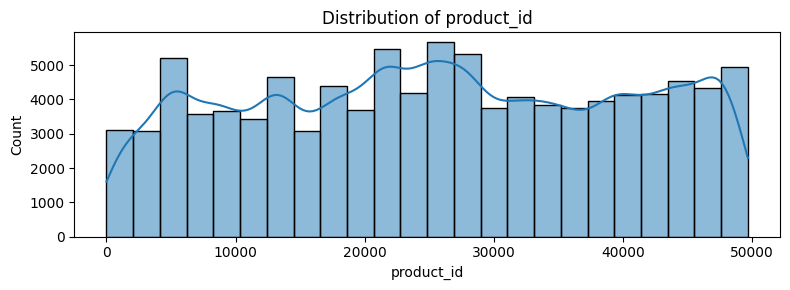

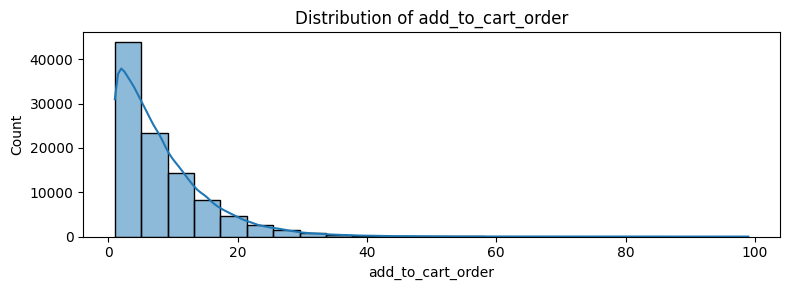

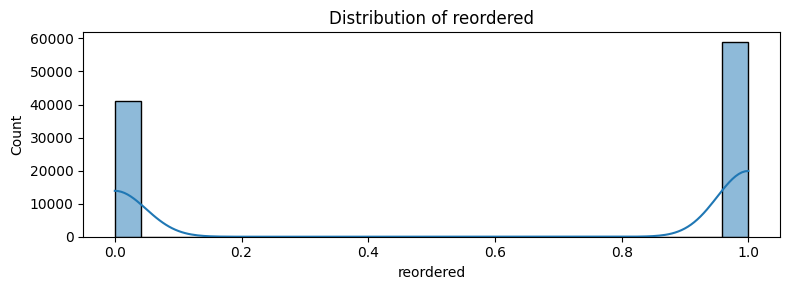

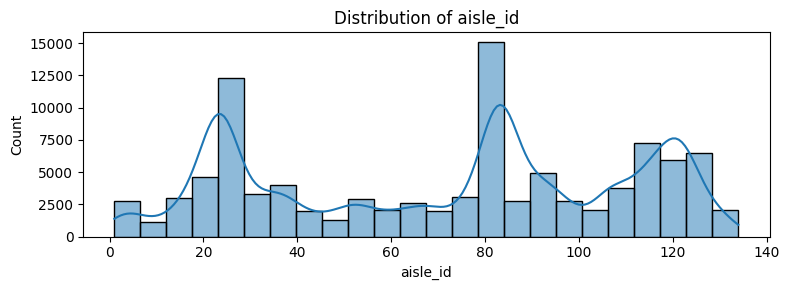

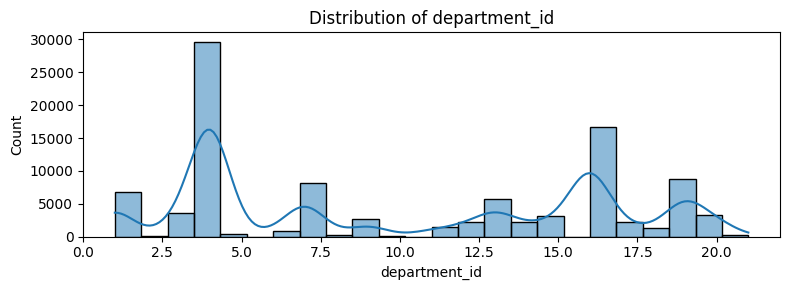

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.histplot(df[col], kde=True, bins=24)
    plt.title("Distribution of "+col)
    plt.tight_layout()
    plt.show()

## Univariate Analysis

Analysis of a single column whether it is numerical or categorical

Graphs used for numerical
1.histogram

Graphs used for categorical
1.pie
2.bar chart of   value counts

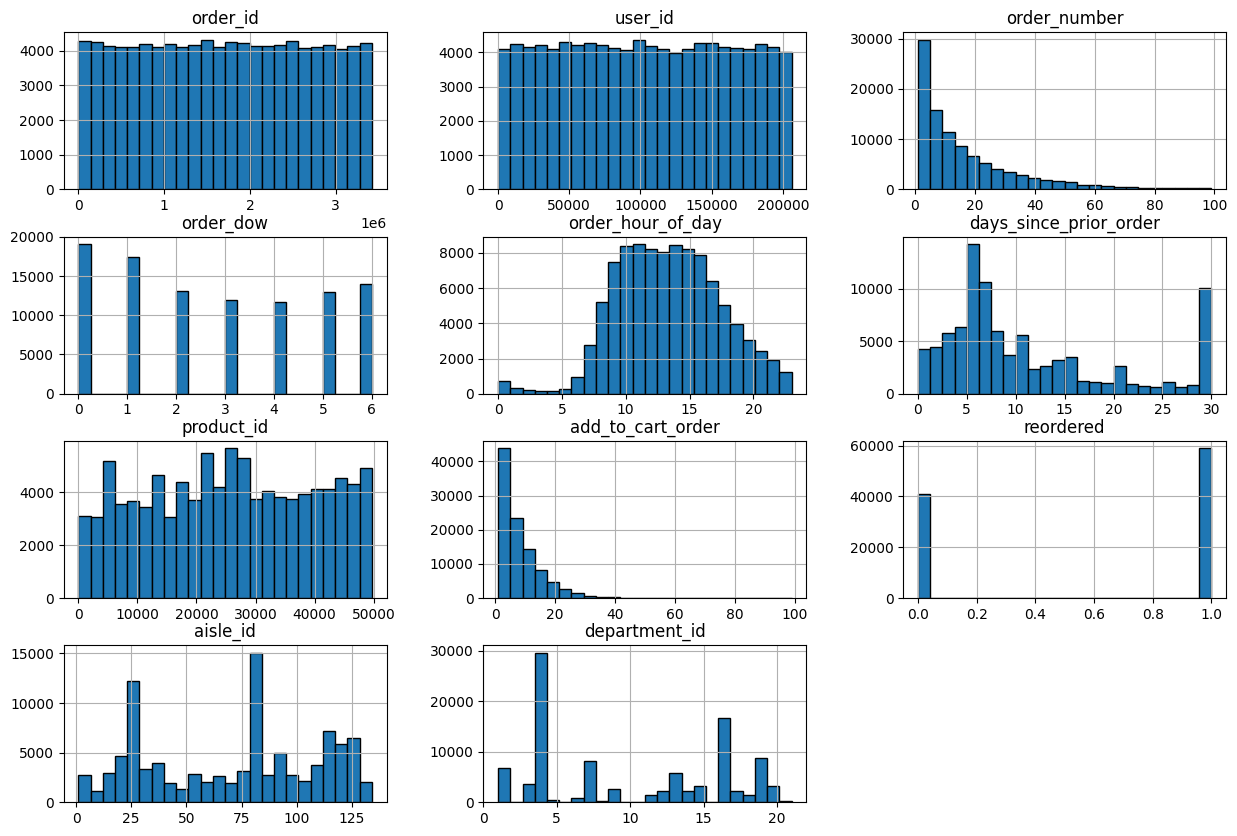

In [ ]:
df.hist(figsize=(15,10),bins=24,edgecolor="black")
plt.show()

#### Observed Patterns:
* 1. Order_dow: this Graph Represents Orders  in Day of The Week , The Graph Shows a trend That Sunday,Monday,Saturday Are the Most Selling Days
* 2. Order_Hour_of_day : This Graph Shows a Trend that Most of the sales Happened from 10 AM to 3 PM.
* 3. days_since_prior_order : This Graph Shows a Trend That Most Of the People Will Make Order After 5-10 days and after 30 days.

In [9]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_cols)

['eval_set', 'product_name', 'department']


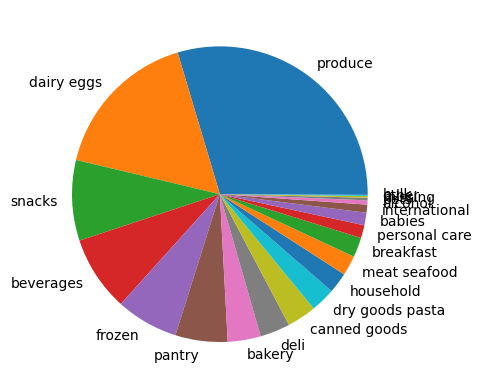

In [8]:
plt.pie(x=df["department"].value_counts(),labels=df["department"].value_counts().index)
plt.show()

#### we dont use pie chart if the sections of pie are more than 6 so we use bar instead pie.because it makes pie chart weird and not comfortable to read


### top products by count , i.e no.of orders

<Axes: xlabel='order_dow', ylabel='Count'>

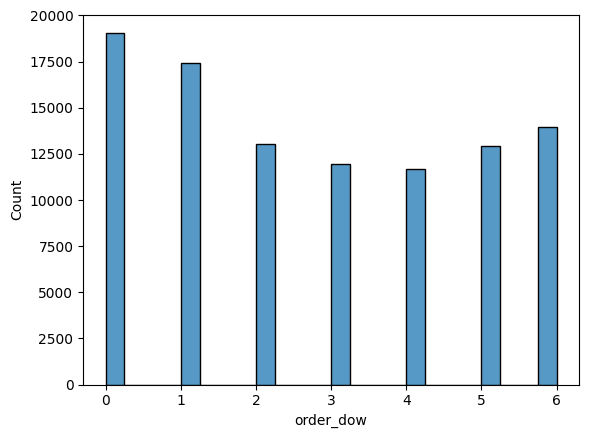

In [7]:
sns.histplot(df["order_dow"],bins=24)

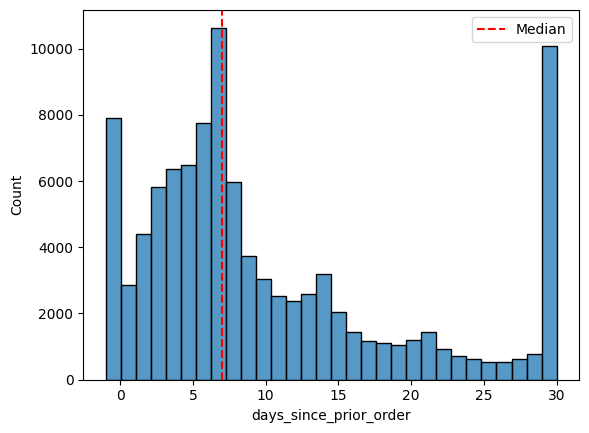

In [10]:
sns.histplot(df["days_since_prior_order"],bins=30)
plt.axvline(df["days_since_prior_order"].median(), color='red', linestyle='--', label='Median')
plt.legend()

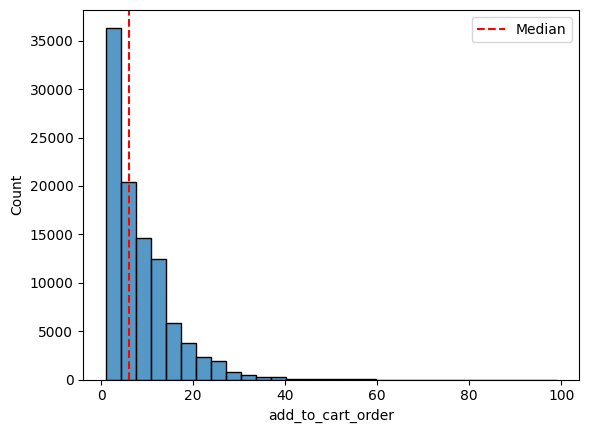

In [12]:
sns.histplot(df["add_to_cart_order"],bins=30)
plt.axvline(df["add_to_cart_order"].median(), color='red', linestyle='--', label='Median')
plt.legend()

Text(0.5, 0, 'Count')

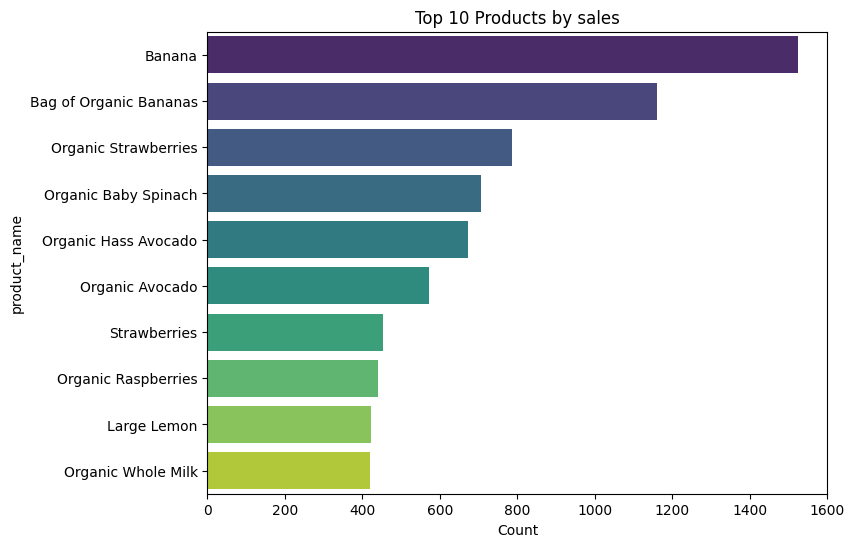

In [13]:
# Top products
top_products = df['product_name'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Products by sales')
plt.xlabel('Count')

#### Observations:
* 1. Banana Is the Most Selling Item
* 2. Bag of Organic Bananas is The Second Most Selling Product
* 3. Followed by StrawBerry.

### top depratments by count , i.e, order count

Text(0.5, 0, 'Count')

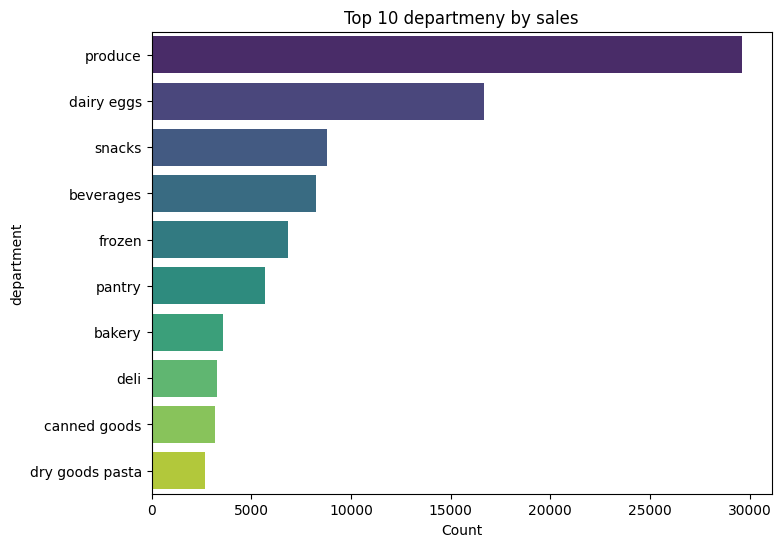

In [14]:
# Top 10 departments
top_products = df['department'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 departmeny by sales')
plt.xlabel('Count')

#### Observations: 
* 1.  Produce is the Top Most Department With Sales 29,610.
* 2. Second Most Selling Department is dairy Eggs.
* 3. Followed By Snacks.

### Peak order days of hour
###Graph used Histogram

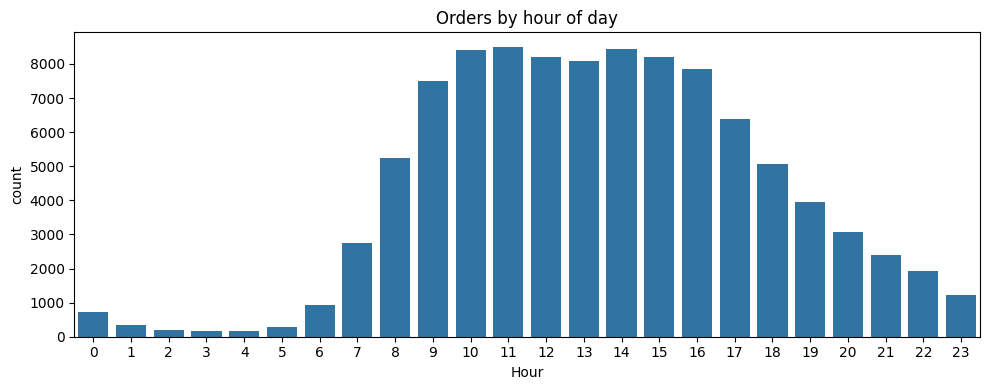

In [ ]:
#Orders by Day of Hour
plt.figure(figsize=(10,4))
sns.countplot(x=df['order_hour_of_day'], color='tab:blue')
plt.title('Orders by hour of day')
plt.xlabel('Hour')
plt.tight_layout()

### No. of Orders  By User.

Median orders per user: 1.0


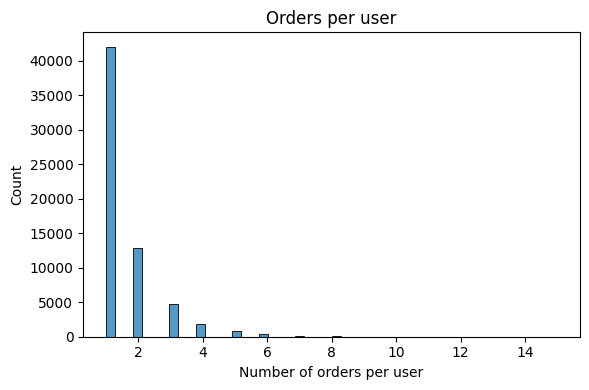

In [ ]:
# Distribution of orders per user
orders_per_user = df.groupby('user_id')['order_id'].nunique()
plt.figure(figsize=(6,4))
sns.histplot(orders_per_user, bins=50, kde=False)
plt.title('Orders per user')
plt.xlabel('Number of orders per user')
plt.tight_layout()
print('Median orders per user:', orders_per_user.median())

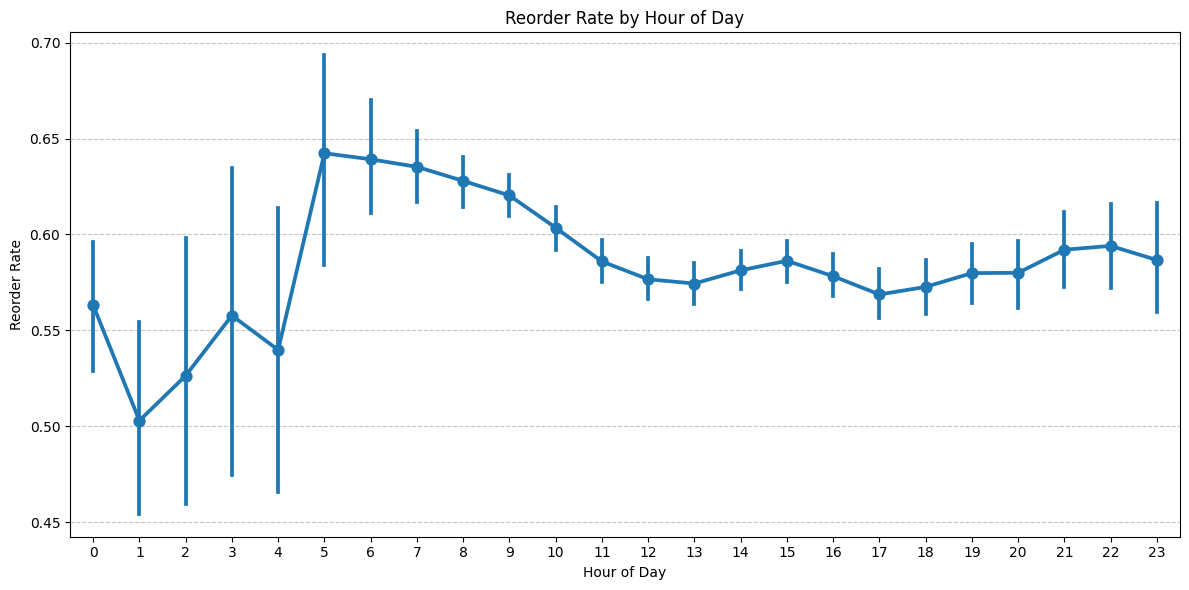

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='order_hour_of_day', y='reordered', data=df)
plt.title('Reorder Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Reorder Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Observation : The Peak Time For Reordering is Around 4-5

<Axes: xlabel='user_id'>

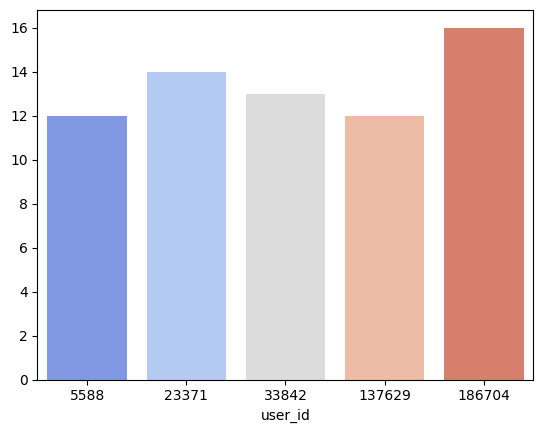

In [11]:
# loyal customers
top_costumers=df["user_id"].value_counts().head(5)
sns.barplot(x=top_costumers.index,y=top_costumers.values,palette="coolwarm")

#### Observation : Users with User_id 5588,23371,33842,137629,186704 are Loyal Customers i.e Most Buying Customers.

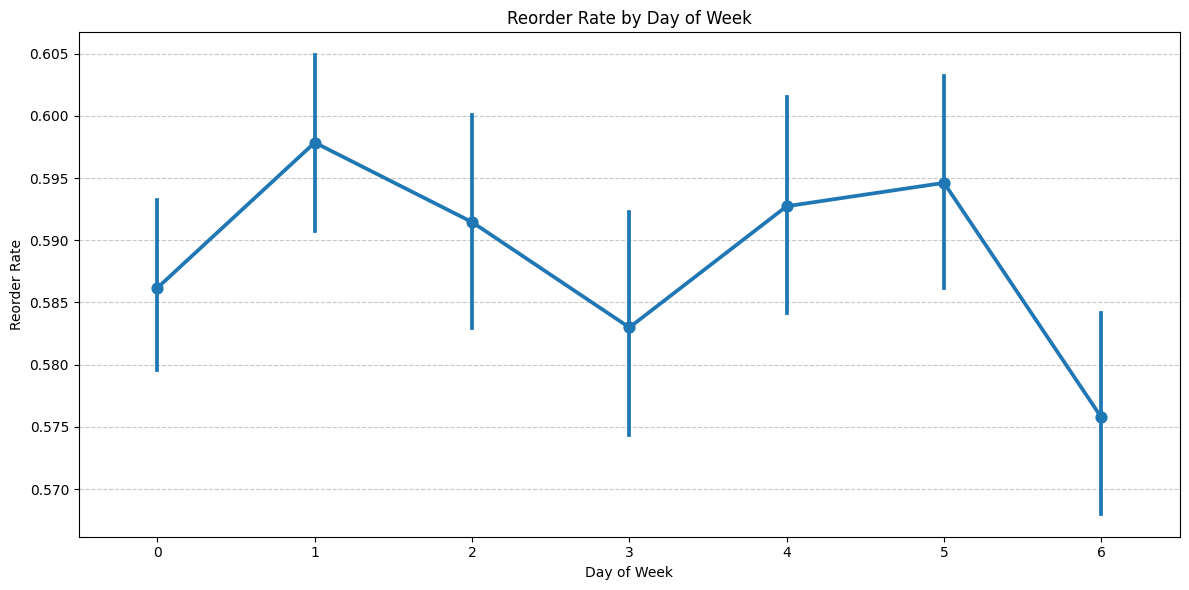

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='order_dow', y='reordered', data=df)
plt.title('Reorder Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Reorder Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

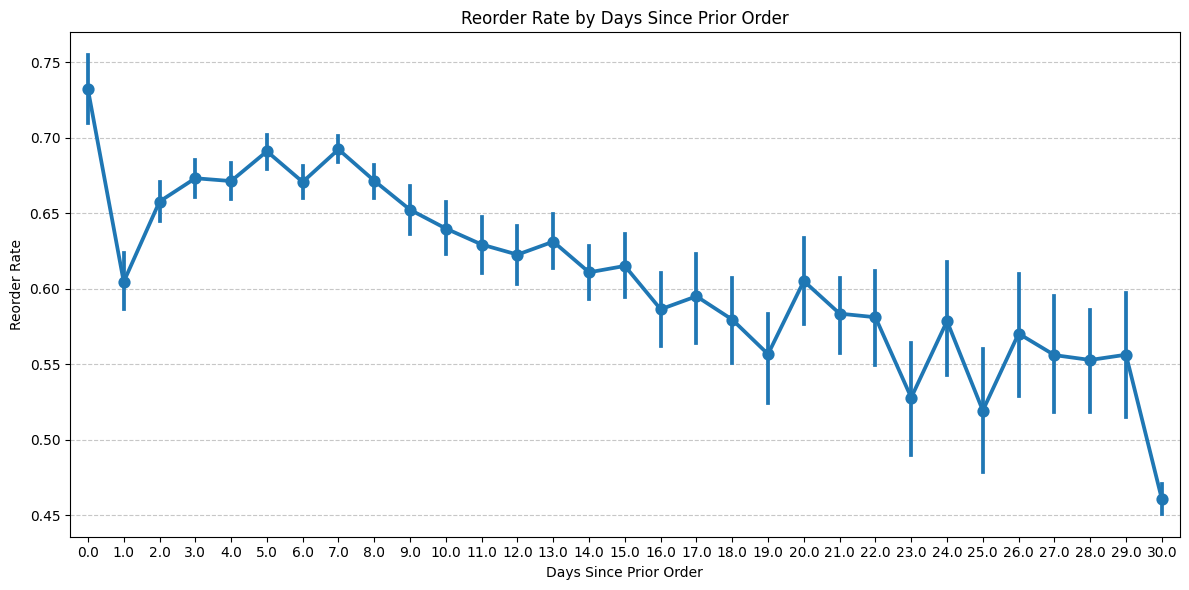

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='days_since_prior_order', y='reordered', data=df)
plt.title('Reorder Rate by Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Reorder Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

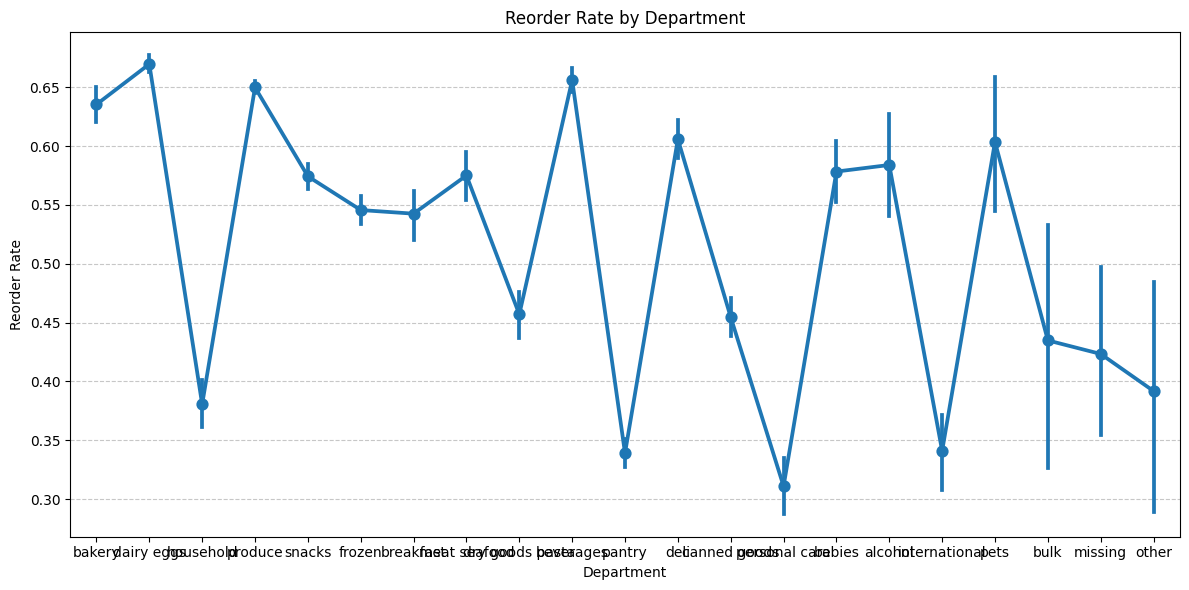

In [25]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='department', y='reordered', data=df)
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

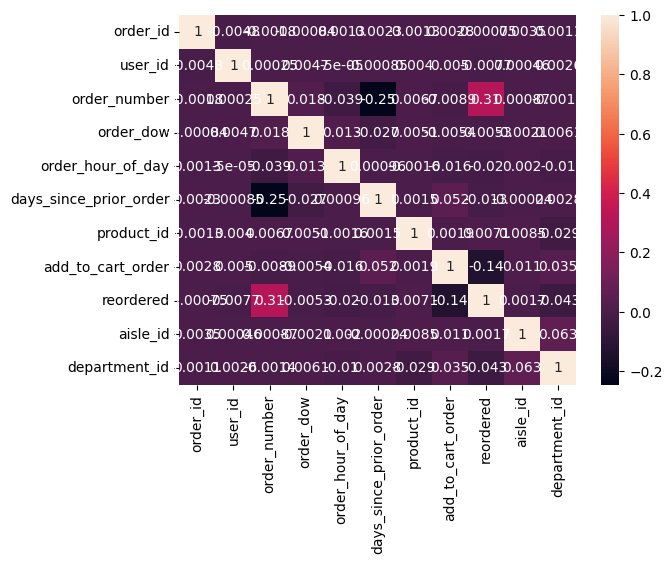

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [13]:
df.skew(numeric_only=True)

order_id                  0.001046
user_id                   0.006329
order_number              1.765989
order_dow                 0.178464
order_hour_of_day        -0.061586
days_since_prior_order    1.010061
product_id               -0.024348
add_to_cart_order         1.814090
reordered                -0.361447
aisle_id                 -0.167989
department_id             0.160468
dtype: float64

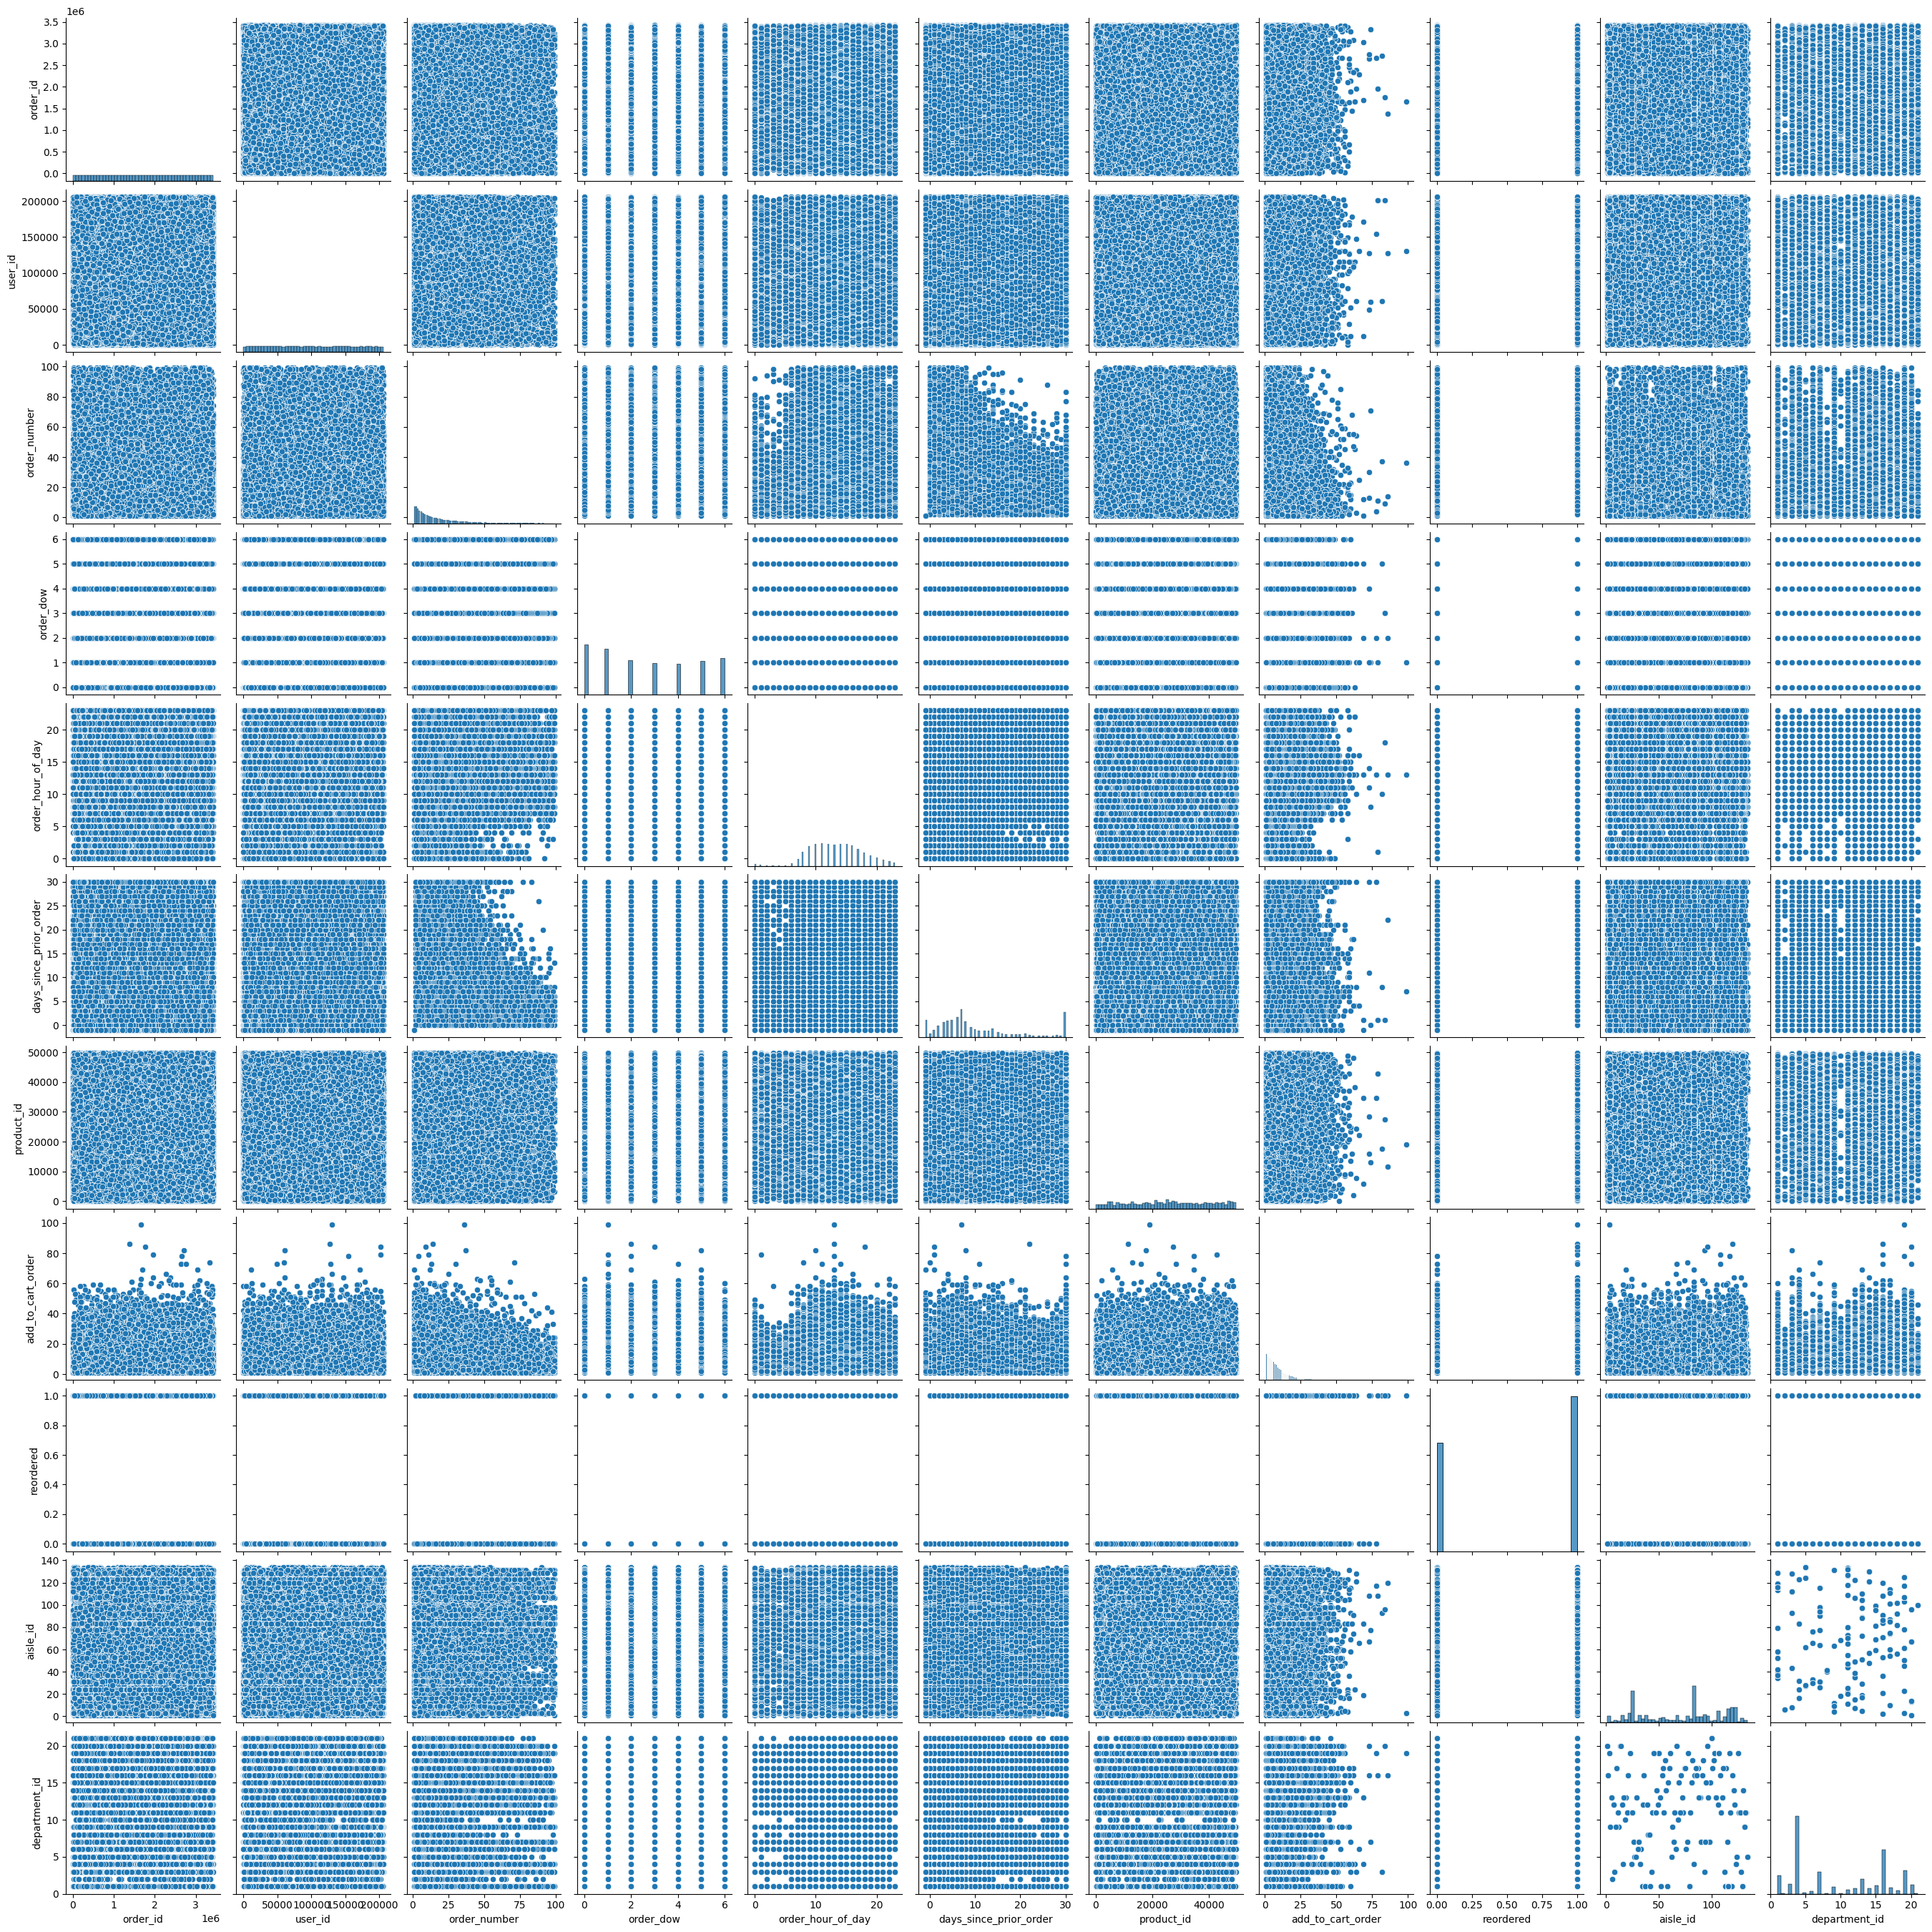

In [16]:
sns.pairplot(data=df,vars=num_cols)
plt.show()

In [34]:
df

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0       2046857   186256    prior            20          4                 12   
1        512195   179205    prior             3          3                 15   
2       2643829    38899    prior             1          5                 17   
3       2818258   198321    prior             2          0                 12   
4       3328253   134750    prior            22          3                  6   
...         ...      ...      ...           ...        ...                ...   
99995   2852375   144798    prior             3          4                  6   
99996   3316036    81773    prior            11          1                 14   
99997    299413    93582    prior            10          1                  9   
99998    334732   112061    prior             8          1                  9   
99999   2413500   150661    prior            16          3                 15   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                         3.0       30440                  9          1   
1                        26.0       35951                  3          1   
2                        -1.0         605                 17          0   
3                         8.0       26209                  6          0   
4                         3.0       29447                  2          1   
...                       ...         ...                ...        ...   
99995                     6.0        3647                 39          0   
99996                     6.0       40627                  6          0   
99997                     3.0       45066                  1          1   
99998                    20.0        6669                  1          1   
99999                    16.0       34540                 11          0   

                                            product_name  aisle_id  \
0                                       Chocolate Crepes        93   
1                        Organic Unsweetened Almond Milk        91   
2      Natural Liquid Laundry Detergent - Blue Eucaly...        75   
3                                                  Limes        24   
4                               Milk, Organic, Vitamin D        84   
...                                                  ...       ...   
99995                       Soft Dinner 6 Ct White Rolls        58   
99996                                    Peach Preserves        88   
99997                                   Honeycrisp Apple        24   
99998                            Breakfast Scramble Wrap        52   
99999        2nd Foods Apples & Mangos, With Rice Cereal        92   

       department_id  department  
0                  3      bakery  
1                 16  dairy eggs  
2                 17   household  
3                  4     produce  
4                 16  dairy eggs  
...              ...         ...  
99995              1      frozen  
99996             13      pantry  
99997              4     produce  
99998              1      frozen  
99999             18      babies  

[100000 rows x 14 columns]

## Feature Engineering

In [15]:
product_stats = df.groupby('product_id').agg(
    product_total_orders=('order_id', 'count'),
    product_reorders=('reordered', 'sum'),
    product_reorder_rate=('reordered', 'mean'),
    product_mean_add_to_cart=('add_to_cart_order', 'mean')
).reset_index()
product_stats

product_id  product_total_orders  product_reorders  \
0               1                     6                 2   
1               3                     1                 0   
2               4                     1                 0   
3               8                     1                 0   
4              10                    11                 8   
...           ...                   ...               ...   
16228       49670                     1                 1   
16229       49677                     1                 1   
16230       49678                     2                 2   
16231       49680                     3                 0   
16232       49683                   326               233   

       product_reorder_rate  product_mean_add_to_cart  
0                  0.333333                  6.333333  
1                  0.000000                  5.000000  
2                  0.000000                  5.000000  
3                  0.000000                  3.000000  
4                  0.727273                  4.636364  
...                     ...                       ...  
16228              1.000000                  5.000000  
16229              1.000000                  3.000000  
16230              1.000000                 10.000000  
16231              0.000000                  9.333333  
16232              0.714724                  7.886503  

[16233 rows x 5 columns]

In [16]:
user_stats = df.groupby('user_id').agg(
    user_total_orders=('order_number', 'max'),
    user_total_products=('product_id', 'count'),
    user_reorder_rate=('reordered', 'mean'),
    avg_days_between_orders=('days_since_prior_order', 'mean'),
    avg_basket_size=('add_to_cart_order', 'mean')
).reset_index()
user_stats

user_id  user_total_orders  user_total_products  user_reorder_rate  \
0           25                  3                    1                1.0   
1           27                 53                    1                0.0   
2           31                  1                    1                0.0   
3           37                 22                    2                1.0   
4           38                  7                    1                1.0   
...        ...                ...                  ...                ...   
62964   206200                 21                    2                1.0   
62965   206201                 12                    2                0.5   
62966   206204                  2                    1                1.0   
62967   206208                 17                    1                0.0   
62968   206209                  1                    1                0.0   

       avg_days_between_orders  avg_basket_size  
0                         30.0              6.0  
1                          6.0              3.0  
2                         -1.0             10.0  
3                         19.0              6.0  
4                         28.0              1.0  
...                        ...              ...  
62964                      6.5              8.0  
62965                     10.0              3.0  
62966                     11.0              3.0  
62967                      6.0             12.0  
62968                     -1.0             12.0  

[62969 rows x 6 columns]

In [17]:
user_product = df.groupby(['user_id','product_id']).agg(
    user_product_total_orders=('order_id', 'count'),
    user_product_reorders=('reordered', 'sum'),
    user_product_last_order=('order_number', 'max'),
    user_product_first_order=('order_number', 'min')
).reset_index()

user_product['user_product_reorder_rate'] = (
    user_product['user_product_reorders'] / user_product['user_product_total_orders']
)
user_product

user_id  product_id  user_product_total_orders  user_product_reorders  \
0           25       22008                          1                      1   
1           27       21386                          1                      0   
2           31        7788                          1                      0   
3           37       13932                          1                      1   
4           37       21616                          1                      1   
...        ...         ...                        ...                    ...   
99012   206201         294                          1                      1   
99013   206201       21133                          1                      0   
99014   206204       30561                          1                      1   
99015   206208       16083                          1                      0   
99016   206209       23594                          1                      0   

       user_product_last_order  user_product_first_order  \
0                            3                         3   
1                           53                        53   
2                            1                         1   
3                           11                        11   
4                           22                        22   
...                        ...                       ...   
99012                       12                        12   
99013                        5                         5   
99014                        2                         2   
99015                       17                        17   
99016                        1                         1   

       user_product_reorder_rate  
0                            1.0  
1                            0.0  
2                            0.0  
3                            1.0  
4                            1.0  
...                          ...  
99012                        1.0  
99013                        0.0  
99014                        1.0  
99015                        0.0  
99016                        0.0  

[99017 rows x 7 columns]

In [54]:
user_total_orders = df.groupby('user_id')['order_number'].max()
user_total_orders.head()

user_id
25     3
27    53
31     1
37    22
38     7
Name: order_number, dtype: int64

In [55]:
previous_reorder_ratio = df.groupby('user_id')['reordered'].mean()
previous_reorder_ratio.head()

user_id
25    1.0
27    0.0
31    0.0
37    1.0
38    1.0
Name: reordered, dtype: float64

In [18]:
df['recency'] = df.groupby('user_id')['order_number'].transform(lambda x: x.max() - x)
df[['user_id', 'order_number', 'recency']].head()

user_id  order_number  recency
0   186256            20        0
1   179205             3        0
2    38899             1       17
3   198321             2        1
4   134750            22        0

<Axes: >

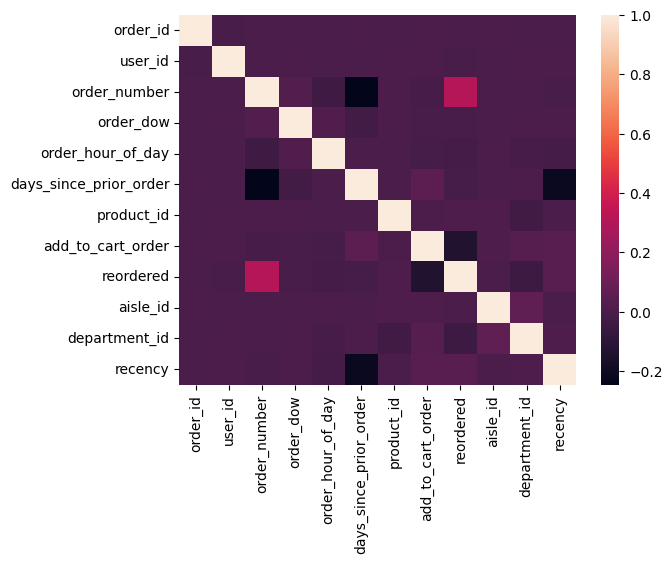

In [23]:
sns.heatmap(df.corr(numeric_only=True))

# Machine Learning Implementation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics  import *

In [32]:
selected_features = [
    'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
    'days_since_prior_order', 'product_id', 'add_to_cart_order',
    'aisle_id', 'department_id', 'department'
]

In [33]:
x = df[selected_features]
y = df['reordered']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [35]:
numerical_features = x.select_dtypes(include=np.number).columns.tolist()
categorical_features = x.select_dtypes(include='object').columns.tolist()


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing to the training and testing data
x_train_processed_new = preprocessor_new.fit_transform(x_train)
x_test_processed_new = preprocessor_new.transform(x_test)

In [37]:
model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', verbose=1)
model.fit(x_train_processed_new, y_train)
pred = model.predict(x_test_processed_new)

[LibLinear]

In [43]:
accuracy_log_reg_new = accuracy_score(y_test, pred)
precision_log_reg_new = precision_score(y_test, pred)
recall_log_reg_new = recall_score(y_test,pred)
f1_log_reg_new = f1_score(y_test,pred)

In [18]:
print(f"\nAccuracy (Logistic Regression): {accuracy_log_reg_new:.4f}")
print(f"Precision (Logistic Regression): {precision_log_reg_new:.4f}")
print(f"Recall (Logistic Regression): {recall_log_reg_new:.4f}")
print(f"F1-Score (Logistic Regression): {f1_log_reg_new:.4f}")


Accuracy (Logistic Regression): 0.7083
Precision (Logistic Regression): 0.7182
Recall (Logistic Regression): 0.8280
F1-Score (Logistic Regression): 0.7692


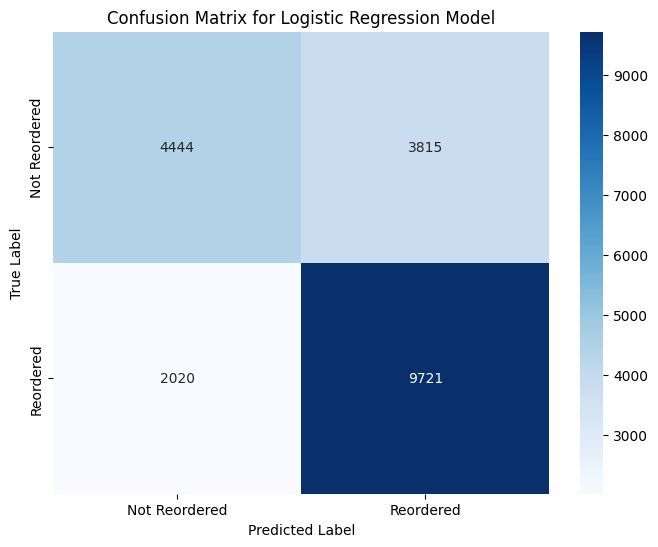

In [19]:
cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Reordered', 'Reordered'],yticklabels=['Not Reordered', 'Reordered'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [20]:
np.random.seed(42)
random_sample = x_train_processed_new[np.random.choice(x_train_processed_new.shape[0], size=5, replace=False)]
print(model.predict(random_sample))
print(model.predict_proba(random_sample))


[1 0 1 1 1]
[[0.067398   0.932602  ]
 [0.53245554 0.46754446]
 [0.16860794 0.83139206]
 [0.29919108 0.70080892]
 [0.22429896 0.77570104]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_processed_new, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test_processed_new)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nAccuracy (Random Forest): {accuracy_rf:.4f}")
print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"Recall (Random Forest): {recall_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")


Accuracy (Random Forest): 0.7230
Precision (Random Forest): 0.7279
Recall (Random Forest): 0.8436
F1-Score (Random Forest): 0.7815


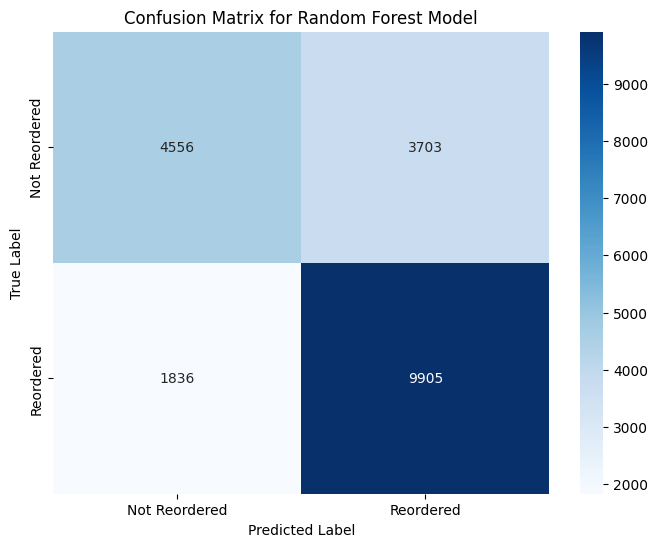

In [56]:
cm = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Reordered', 'Reordered'],yticklabels=['Not Reordered', 'Reordered'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

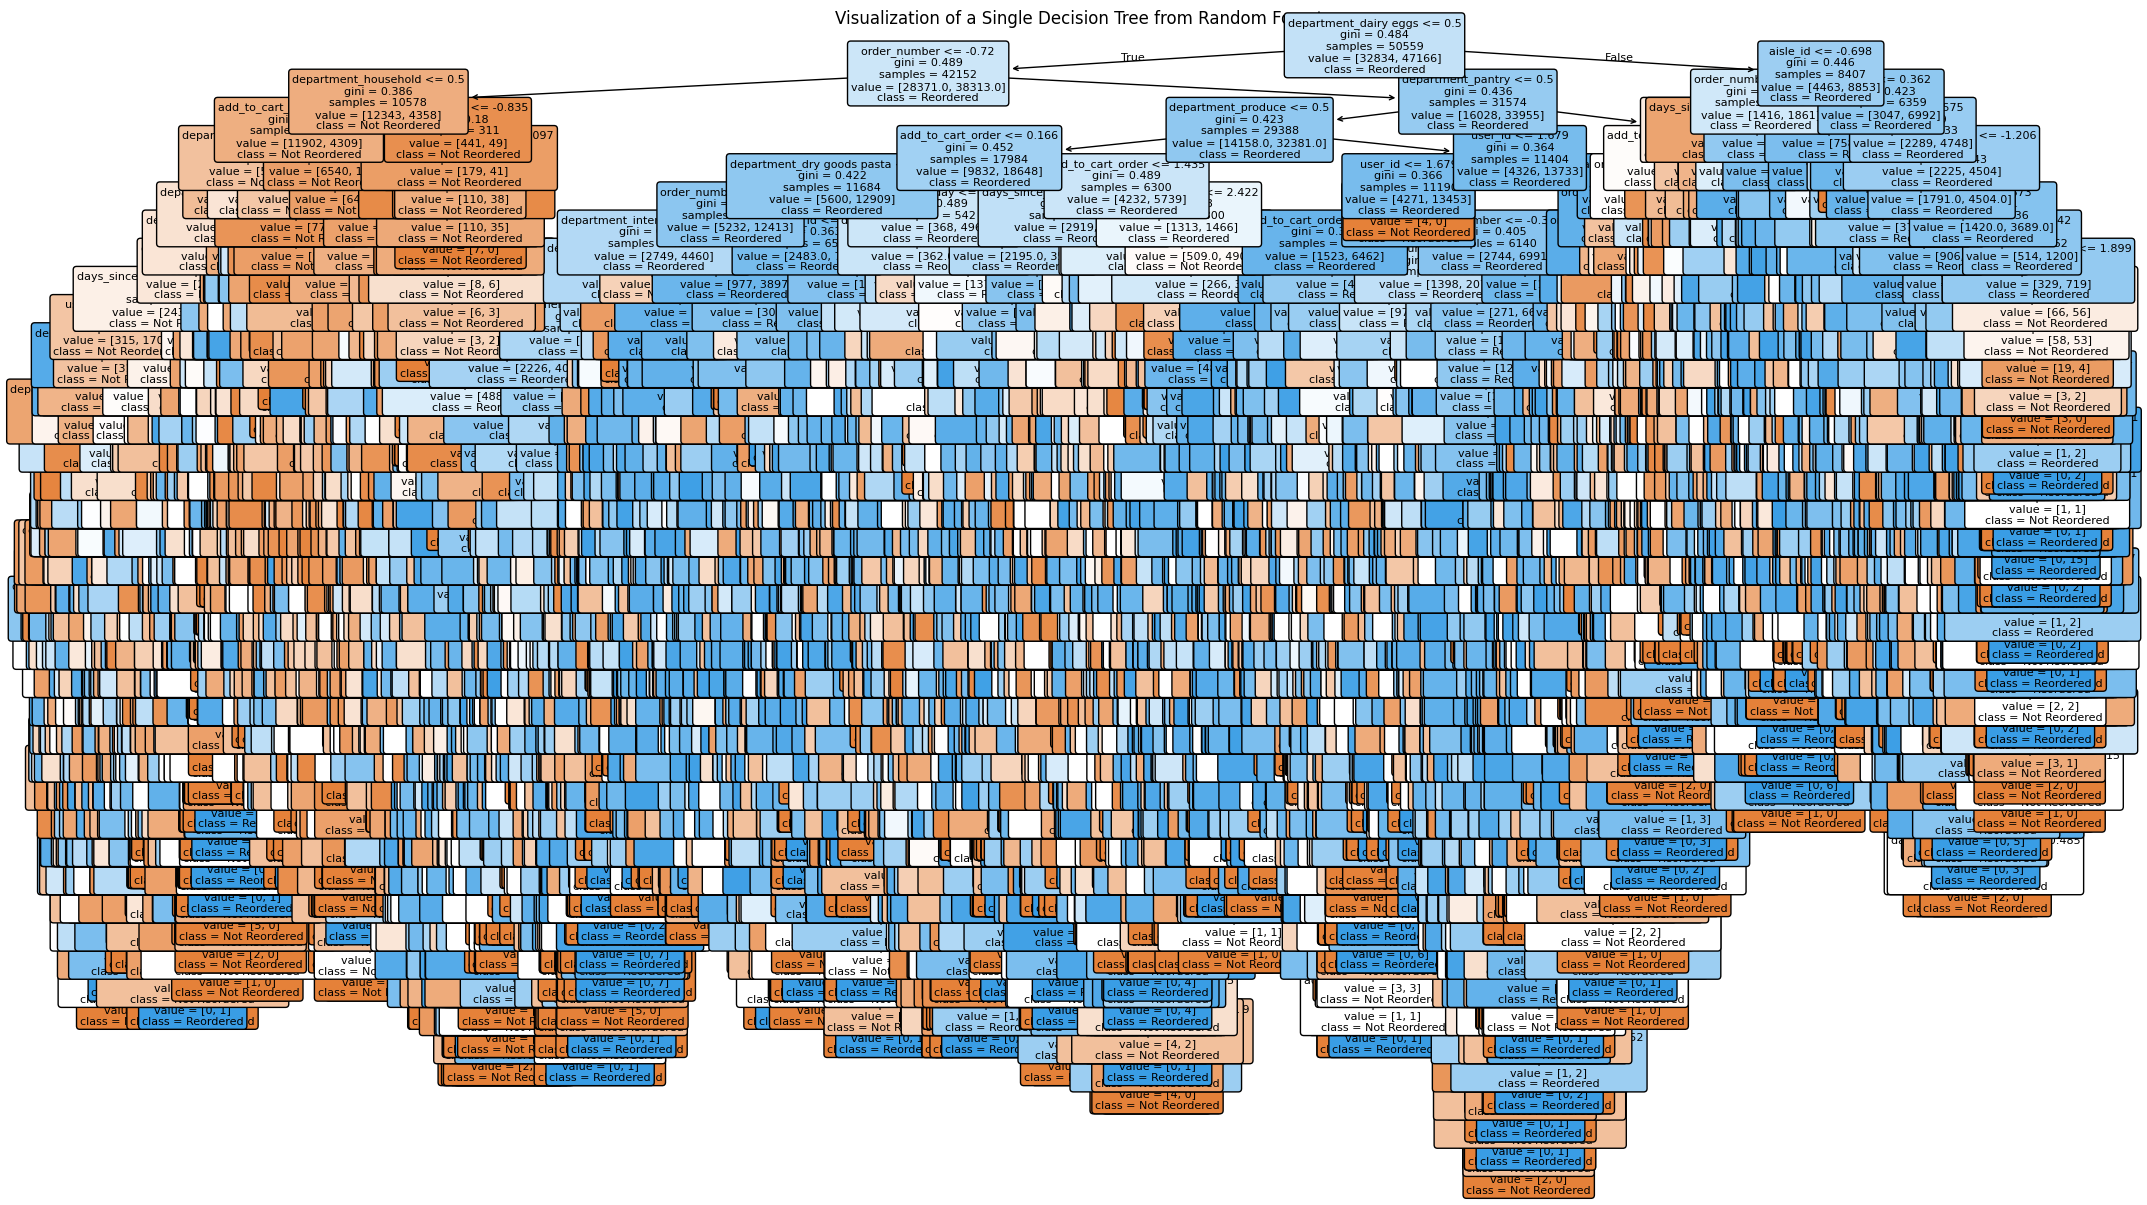

In [68]:
from sklearn.tree import plot_tree

# Select one tree from the Random Forest model
# The Random Forest is an ensemble of trees, so we pick one to visualize
estimator = rf_model.estimators_[0] # Using the first tree as an example

plt.figure(figsize=(25, 15))
plot_tree(
    estimator,
    feature_names=feature_names,
    class_names=['Not Reordered', 'Reordered'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Visualization of a Single Decision Tree from Random Forest')
plt.show()

In [27]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/30/7d/41847e45ff075f3636c95d1000e0b75189aed4f1ae18c36812575bb42b4b/xgboost-3.1.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/72.0 MB 6.7 MB/s eta 0:00:11
   ---------------------------------------- 0.5/72.0 MB 5.6 MB/s eta 0:00:13
   ---------------------------------------- 0.8/72.0 MB 5.4 MB/s eta 0:00:14
    --------------------------------------- 1.0/72.0 MB 5.9 MB/s eta 0:00:13
    --------------------------------------- 1.3/72.0 MB 6.0 MB/s eta 0:00:12
    --------------------------------------- 1.5/72.0 MB 5.8 MB/s eta 0:00:13
   - -------------------------------------- 1.8/72.0 MB 5.5 MB/s eta 0:00:13
   - -------------------------------------- 2.1/72.0 MB 5.5 MB/s eta 0:00:13
   - -------------------------------------- 2.4/72.0 MB 5.8 MB/s eta 0:00:12
   - ---------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Suppress warning for use_label_encoder
xgb_model.fit(x_train_processed_new, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(x_test_processed_new)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"\nAccuracy (XGBoost): {accuracy_xgb:.4f}")
print(f"Precision (XGBoost): {precision_xgb:.4f}")
print(f"Recall (XGBoost): {recall_xgb:.4f}")
print(f"F1-Score (XGBoost): {f1_xgb:.4f}")


Accuracy (XGBoost): 0.7343
Precision (XGBoost): 0.7364
Recall (XGBoost): 0.8525
F1-Score (XGBoost): 0.7902


In [46]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV to the processed training data
grid_search_xgb.fit(x_train_processed_new, y_train)

# Print the best parameters and best score
print(f"Best Parameters (XGBoost): {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Score (XGBoost): {grid_search_xgb.best_score_:.4f}")

# Get the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(x_test_processed_new)

# Evaluate the best model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)


print(f"\nAccuracy (Best XGBoost): {accuracy_best_xgb:.4f}")
print(f"Precision (Best XGBoost): {precision_best_xgb:.4f}")
print(f"Recall (Best XGBoost): {recall_best_xgb:.4f}")
print(f"F1-Score (Best XGBoost): {f1_best_xgb:.4f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters (XGBoost): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Cross-Validation Score (XGBoost): 0.7376

Accuracy (Best XGBoost): 0.7380
Precision (Best XGBoost): 0.7365
Recall (Best XGBoost): 0.8623
F1-Score (Best XGBoost): 0.7944


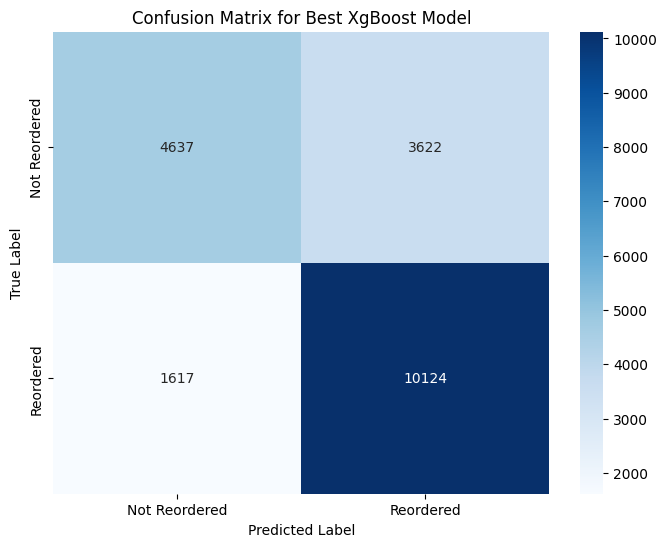

In [57]:
cm = confusion_matrix(y_test,y_pred_best_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Reordered', 'Reordered'],yticklabels=['Not Reordered', 'Reordered'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best XgBoost Model')
plt.show()

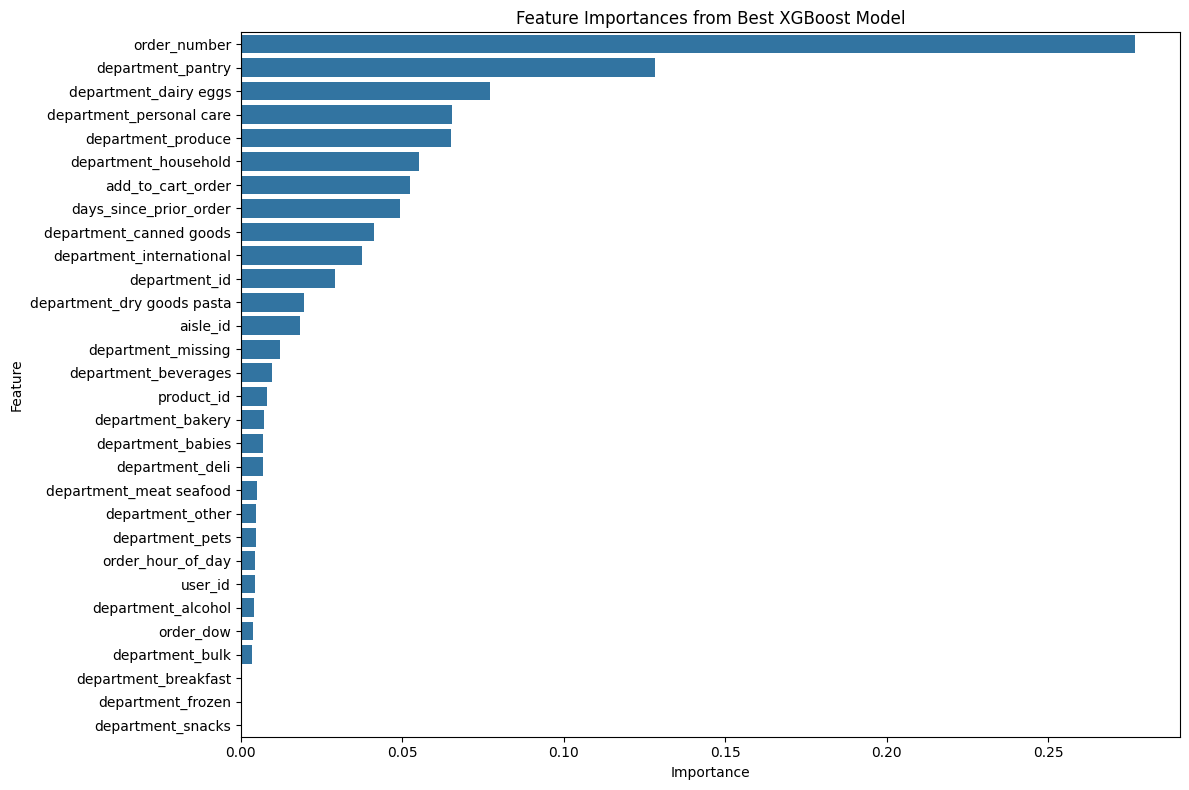

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Get the feature names after one-hot encoding
# The numerical features remain the same, and categorical features are expanded
feature_names = numerical_features + list(preprocessor_new.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Best XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [25]:
import joblib

# Filenames
model_filename = "best_xgb_model.pkl"
preprocessor_filename = "preprocessor.pkl"
feature_names_filename = "feature_names.pkl"

# Save model and preprocessor (assumes these variables exist in the notebook namespace)
joblib.dump(best_xgb_model, model_filename)
joblib.dump(preprocessor_new, preprocessor_filename)

# Construct feature names: numerical + one-hot encoded categorical feature names
num_feat = numerical_features  # list of numerical feature names
cat_feat = categorical_features  # list of categorical feature names

try:
    cat_feature_names = preprocessor_new.named_transformers_["cat"].get_feature_names_out(cat_feat)
except AttributeError:
    # Fallback for older sklearn versions
    cat_feature_names = preprocessor_new.named_transformers_["cat"].get_feature_names(cat_feat)

feature_names = list(num_feat) + list(cat_feature_names)
joblib.dump(feature_names, feature_names_filename)

print(f"Saved model -> {model_filename}")
print(f"Saved preprocessor -> {preprocessor_filename}")
print(f"Saved feature names -> {feature_names_filename}")

Saved model -> best_xgb_model.pkl
Saved preprocessor -> preprocessor.pkl
Saved feature names -> feature_names.pkl


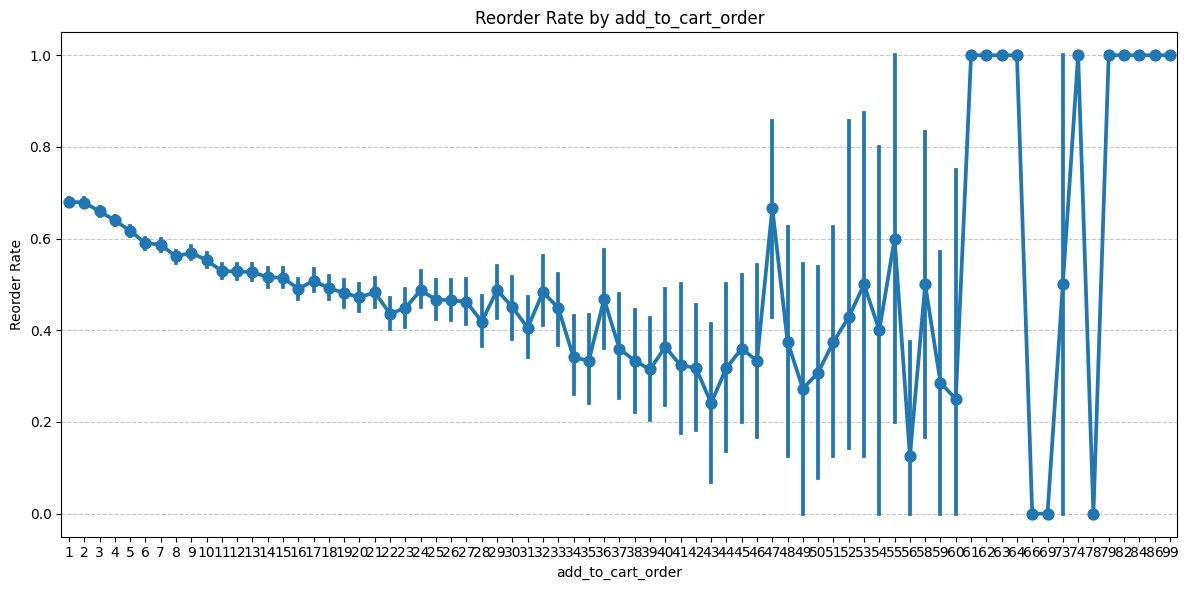

In [29]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='add_to_cart_order', y='reordered', data=df)
plt.title('Reorder Rate by add_to_cart_order')
plt.xlabel('add_to_cart_order')
plt.ylabel('Reorder Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# Create a dictionary with model performance metrics
model_performance = {
    "Model": ["Logistic Regression","Random Forest", "XGBoost", "Best XGBoost"],
    "Accuracy": [accuracy_log_reg_new, accuracy_rf, accuracy_xgb, accuracy_best_xgb],
    "Precision": [precision_log_reg_new, precision_rf, precision_xgb, precision_best_xgb],
    "Recall": [recall_log_reg_new, recall_rf, recall_xgb, recall_best_xgb],
    "F1-Score": [f1_log_reg_new,f1_rf, f1_xgb, f1_best_xgb]
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance table
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression   0.70825   0.718159  0.827953  0.769158
1        Random Forest   0.72305   0.727881  0.843625  0.781490
2              XGBoost   0.73430   0.736443  0.852483  0.790226
3         Best XGBoost   0.73805   0.736505  0.862277  0.794444


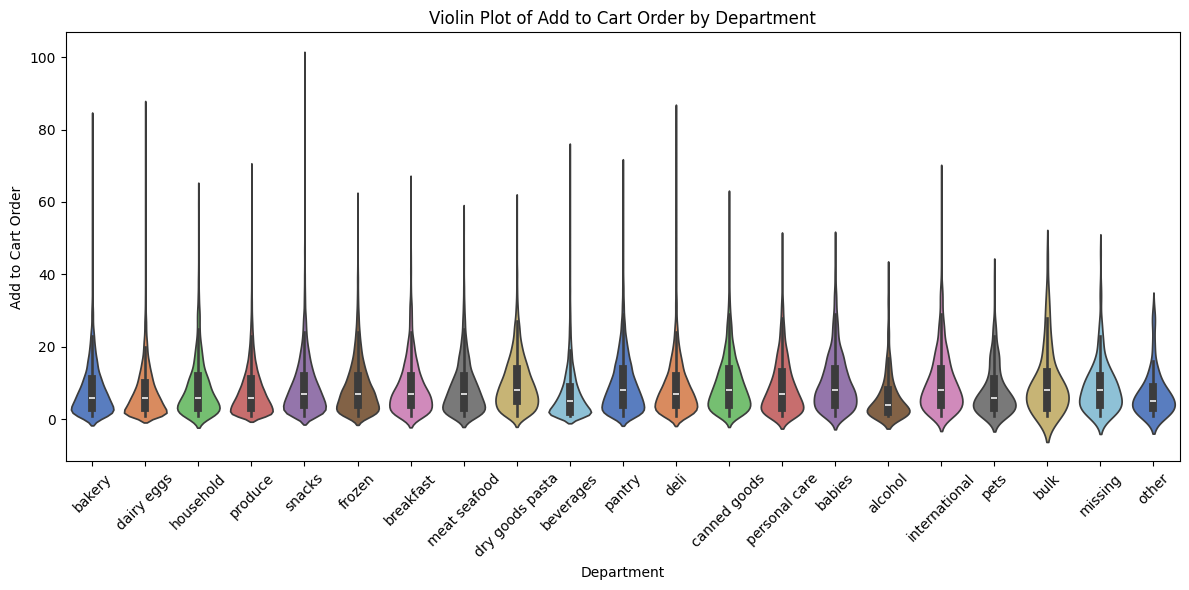

In [53]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='department', y='add_to_cart_order', data=df, palette='muted')
plt.title('Violin Plot of Add to Cart Order by Department')
plt.xlabel('Department')
plt.ylabel('Add to Cart Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()